# Familarization

### Play with data

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from matplotlib.pylab import rcParams
from pandas.core import datetools
rcParams['figure.figsize'] = 15, 7
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy import  stats
import statsmodels.api as sm

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  if __name__ == '__main__':


In [2]:
##################################################
#               LOAD DATA                        #
##################################################
train03 = pd.read_csv('BATADAL_dataset03.csv')
train04 = pd.read_csv('BATADAL_dataset04.csv')
# (8761, 45)
# (4177, 45)
row = 10
# print(train03.shape, train03.iloc[row],'\n',train04.shape, train04.iloc[row])
train03.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [3]:
train03.describe()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,...,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0
mean,2.676905,3.285748,4.201820,3.568129,2.748205,5.370437,3.302672,100.926032,1.0,69.464357,...,79.411082,27.776600,82.737615,24.453808,74.459039,24.362250,67.921632,33.755911,29.453266,0.0
std,1.202940,1.468621,0.678465,0.539656,0.735162,0.177459,0.828849,10.048618,0.0,42.239742,...,8.461924,2.720291,7.502937,4.416089,9.974357,4.438203,5.321227,4.232716,2.658146,0.0
min,0.320112,0.293876,2.882847,2.002133,1.293241,4.824605,1.054194,85.495201,1.0,0.000000,...,65.059624,20.690191,54.757198,14.797167,58.325397,14.541955,51.697071,27.649677,22.370066,0.0
25%,1.650647,2.131776,3.623394,3.139640,2.123508,5.248147,2.631062,94.342598,1.0,0.000000,...,71.978676,26.674088,83.912292,20.516289,62.949253,20.409576,66.718307,30.668709,28.432796,0.0
50%,2.798855,3.498371,4.240439,3.574840,2.758198,5.500000,3.252838,96.729073,1.0,94.075195,...,75.879807,28.110842,85.219460,22.969397,81.176102,22.856150,68.807007,32.222023,29.834288,0.0
75%,3.754744,4.570782,4.793697,4.009889,3.372392,5.500000,3.986883,112.294952,1.0,96.614708,...,88.221329,29.553995,86.416519,28.457081,82.673698,28.382421,71.218712,38.134647,31.275637,0.0
max,4.871329,5.663802,5.433022,4.690665,4.162726,5.500000,4.999618,122.705627,1.0,100.140671,...,94.961258,33.763836,105.951820,36.325947,89.053986,36.325947,96.180450,45.388145,35.161724,0.0


### There are sensor data and actuator data

In [4]:
print(list(train03))

['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG']


In [5]:
L_group = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']
FS_1_6_group = ['F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6']
FS_7_12_group = [ 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2']
P_group = ['P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

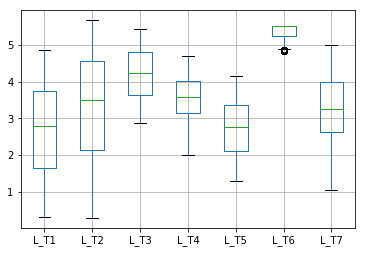

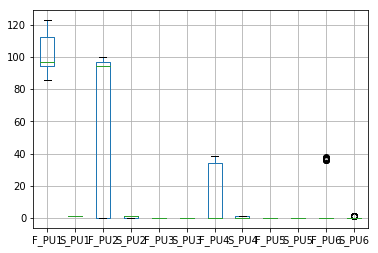

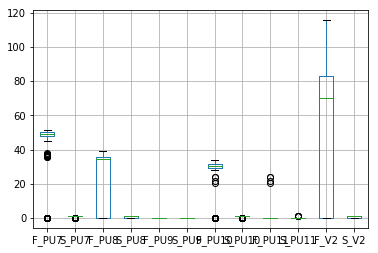

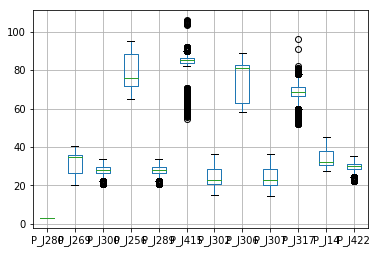

In [6]:
# remove_datatime_and_attflag = train03.drop('DATETIME', 1)
# remove_datatime_and_attflag = remove_datatime_and_attflag.drop('ATT_FLAG', 1)
# remove_datatime_and_attflag.boxplot(column=list(remove_datatime_and_attflag))
train03.boxplot(column = L_group)
plt.show()
train03.boxplot(column = FS_1_6_group)
plt.show()
train03.boxplot(column = FS_7_12_group)
plt.show()
train03.boxplot(column = P_group)
plt.show()

In [7]:
def heatmap(dataset, labe11,label2,type):
    filtered_data=dataset[dataset['simple_journal']==type]
    aggregation_data=filtered_data.groupby([label1,label2]).size().reset_index(name='count')
    aggregation_data.info()
    
    x = list(dataset[label1][dataset.simple_journal == 'Chargeback'].unique())
    y = list(dataset[label2][dataset.simple_journal == 'Chargeback'].unique())
    aggregation_data = aggregation_data[aggregation_data[label1].isin(x)]
    aggregation_data = aggregation_data[aggregation_data[label2].isin(y)]
    aggregation_data.info()
    print(x)
    
    pivot_data = aggregation_data.pivot(index=label2, columns=label1, values='count')
    sns.heatmap(pivot_data, cmap='viridis', linewidths=.5)
    plt.xlabel(label1)
    plt.ylabel(label2)
    #plt.title(title)
    #plt.savefig(filename)
    plt.show()
    
print(train03.corr())

              L_T1      L_T2      L_T3      L_T4      L_T5      L_T6  \
L_T1      1.000000 -0.241856 -0.051060 -0.013560 -0.106825 -0.088293   
L_T2     -0.241856  1.000000 -0.239759  0.042281 -0.118911 -0.163622   
L_T3     -0.051060 -0.239759  1.000000  0.221428  0.070027 -0.067903   
L_T4     -0.013560  0.042281  0.221428  1.000000 -0.030064 -0.094458   
L_T5     -0.106825 -0.118911  0.070027 -0.030064  1.000000  0.051074   
L_T6     -0.088293 -0.163622 -0.067903 -0.094458  0.051074  1.000000   
L_T7      0.010477  0.036533  0.239311  0.150012 -0.043320  0.472008   
F_PU1     0.038016 -0.402876 -0.099840 -0.005100 -0.039171  0.070081   
S_PU1          NaN       NaN       NaN       NaN       NaN       NaN   
F_PU2    -0.259267  0.409448  0.088429  0.003766  0.049731 -0.009500   
S_PU2    -0.231163  0.410286  0.091363  0.003196  0.047470 -0.019742   
F_PU3          NaN       NaN       NaN       NaN       NaN       NaN   
S_PU3          NaN       NaN       NaN       NaN       NaN      

### Check the correlation of singals

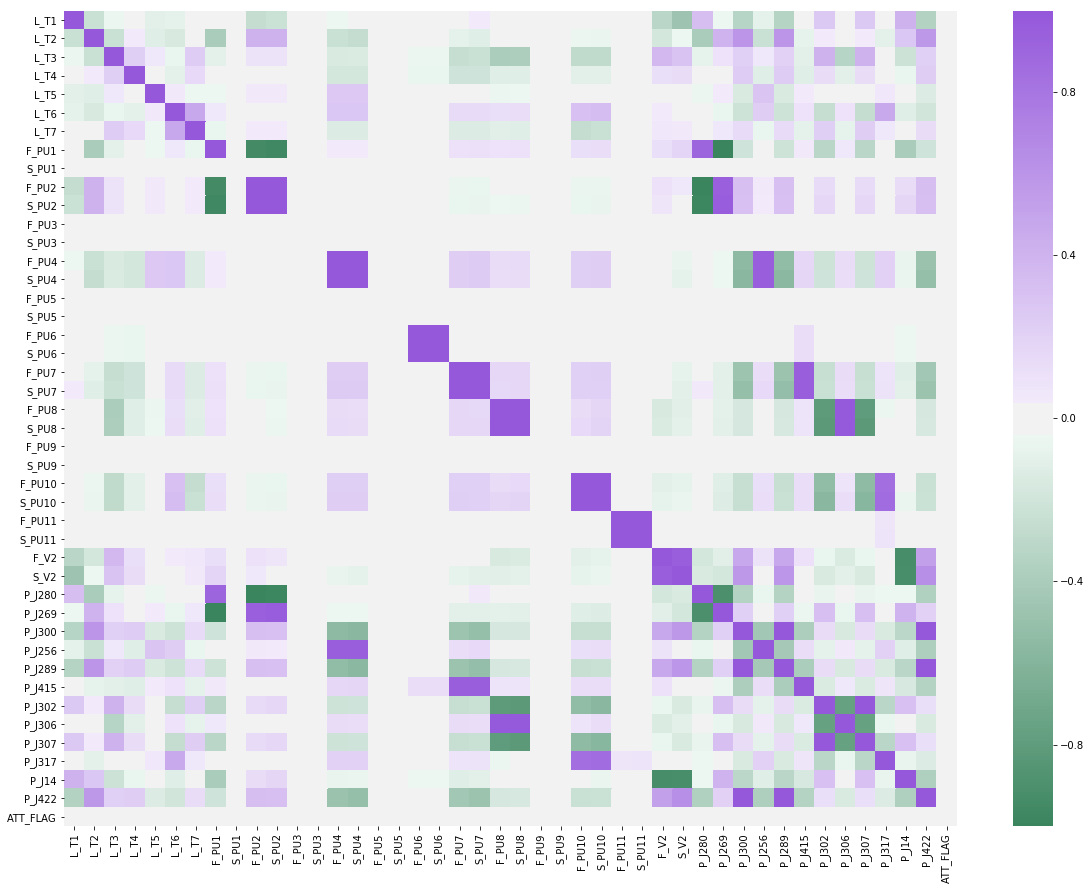

In [431]:
corr=train03.corr()
#corr.info()
#corr.fillna('0')
corr.dropna(axis=0, how='all')
#print(np.isnan(corr))
corr[np.isnan(corr)]=0
f, ax = plt.subplots(figsize=(20, 15))
#corr[corr=='NaN']=0
#cmap = sns.cubehelix_palette(start =6, rot =1, gamma=0.5, as_cmap = True)
cmap = sns.diverging_palette(145, 280, as_cmap=True)
sns.heatmap(corr,vmax=1, vmin=-1,center=0,cmap=cmap,ax=ax)

In [443]:
#----------------------------------------------------------
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H')
series = pd.read_csv('BATADAL_dataset04.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
print(series.index)

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


DatetimeIndex(['2016-07-04 00:00:00', '2016-07-04 01:00:00',
               '2016-07-04 02:00:00', '2016-07-04 03:00:00',
               '2016-07-04 04:00:00', '2016-07-04 05:00:00',
               '2016-07-04 06:00:00', '2016-07-04 07:00:00',
               '2016-07-04 08:00:00', '2016-07-04 09:00:00',
               ...
               '2016-12-24 15:00:00', '2016-12-24 16:00:00',
               '2016-12-24 17:00:00', '2016-12-24 18:00:00',
               '2016-12-24 19:00:00', '2016-12-24 20:00:00',
               '2016-12-24 21:00:00', '2016-12-24 22:00:00',
               '2016-12-24 23:00:00', '2016-12-25 00:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=4177, freq=None)


### Visualize all signals

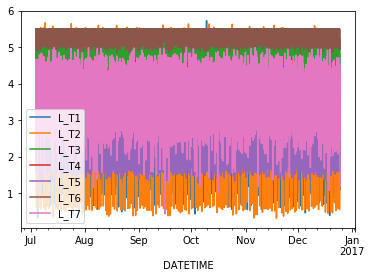

In [11]:
series[L_group].plot()
#autocorrelation_plot(series[L_group])
plt.show()

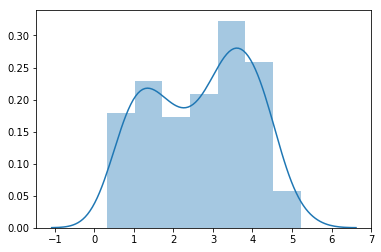

L_T1    2.698191
dtype: float64
L_T1   NaN
dtype: float64
L_T1    3.352632
dtype: float64
L_T1    1.117895
dtype: float64
L_T1    3.059474
dtype: float64
L_T1    3.808421
dtype: float64
L_T1    1.265789
dtype: float64
L_T1    3.541053
dtype: float64
L_T1    3.610526
dtype: float64
L_T1    2.015789
dtype: float64
L_T1    3.178421
dtype: float64
L_T1    2.057222
dtype: float64


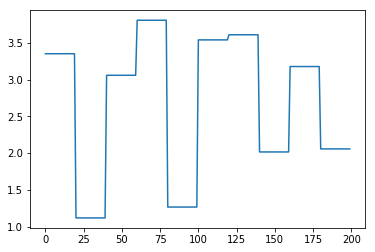

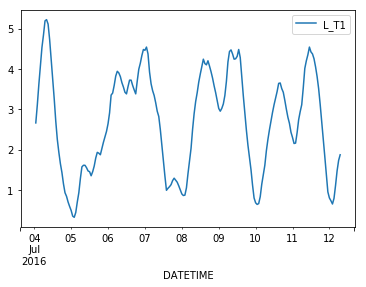

In [444]:
#Discretize the sensor data
length=20
level=4
test=['L_T1']
t=series[test][1:200]
#t.plot()
#plt.show()
sns.distplot(t)
plt.show()
print(t.mean())
i = 0
list = np.zeros(200) 
while (i < 11):
    list[20*(i-1):20*i]=t[20*(i-1)+1:20*i].mean()
    print(t[20*(i-1)+1:20*i].mean())
    i=i+1
plt.plot(list)
t.plot()
plt.show()
    
#t.info()
#print(Math.ceil(t.max())

#Slicing Windows
#size=100
#series[1:size].plot()
#plt.show()

### Cyclic behavior

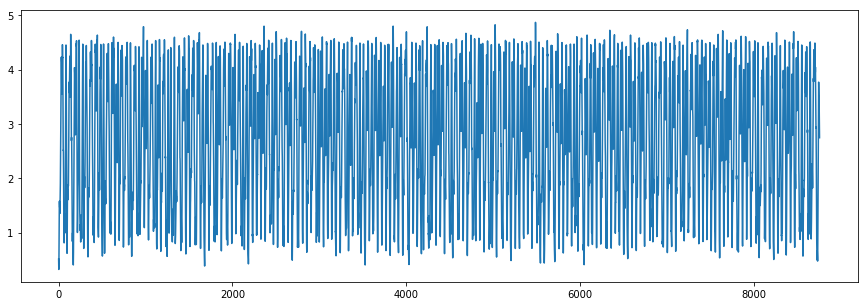

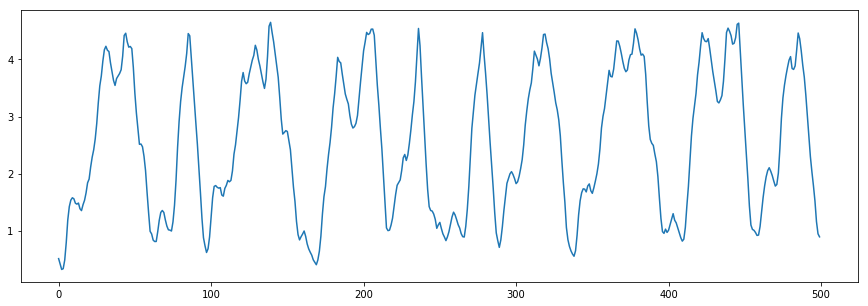

In [445]:
#Visualize L_T1
train03.L_T1.plot(figsize=(15,5))
plt.show()
train03.L_T1[0:500].plot(figsize=(15,5))
plt.show()

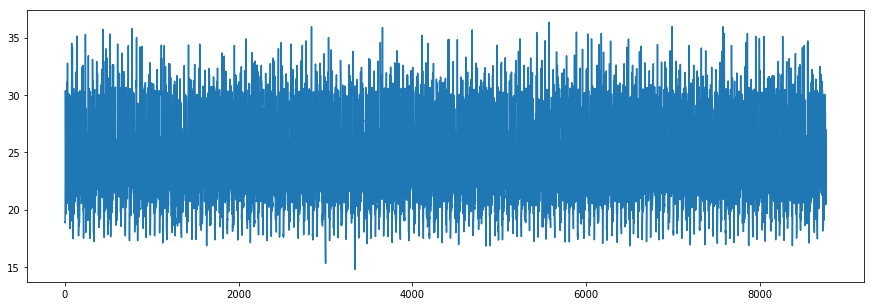

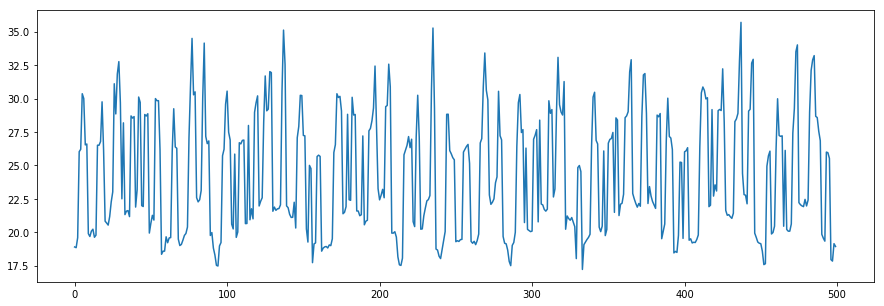

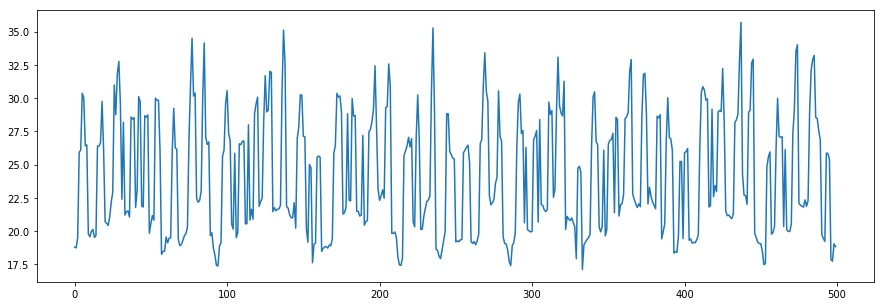

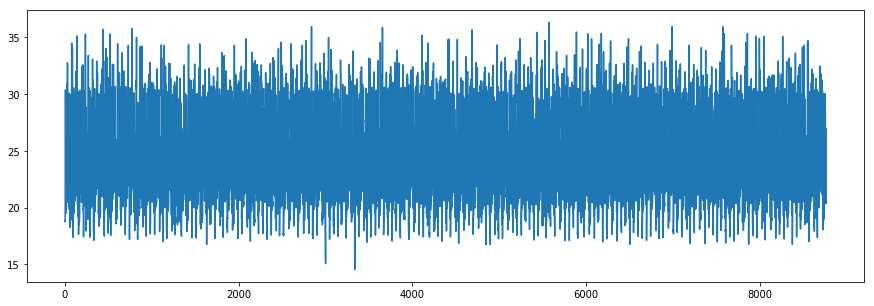

In [446]:
#Visualize P_J302 & P_J307
train03.P_J302.plot(figsize=(15,5))
plt.show()
train03.P_J302[0:500].plot(figsize=(15,5),label='P_J302')
plt.show()
train03.P_J307[0:500].plot(figsize=(15,5))
plt.show()
train03.P_J307.plot(figsize=(15,5))
plt.show()